In [22]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

print(tf.__version__)
print(keras.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
print(x_train_full.shape)
print(x_train_full.dtype)

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model.summary())

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))


2.4.1
2.4.0
(60000, 28, 28)
uint8
Coat
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0100 - accuracy: 0.6865 - val_loss: 0.5179 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 6s

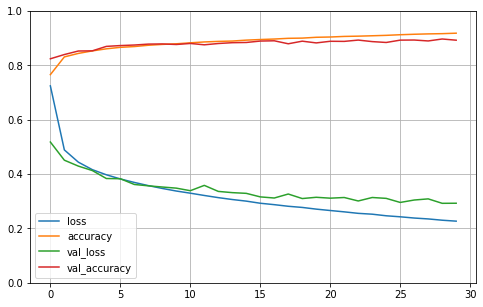

313/313 [==============================] - 1s 3ms/step - loss: 59.0531 - accuracy: 0.8529
[59.0531120300293, 0.8529000282287598]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[1 4 6]
['Trouser' 'Coat' 'Shirt']
[9 2 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print(model.evaluate(x_test, y_test))

x_new = x_test[5:8]
y_proba = model.predict(x_new)
print(y_proba.round(2))

y_pred = model.predict_classes(x_new)
print(y_pred)

print(np.array(class_names)[y_pred])

y_new = y_test[:3]
print(y_new)